In [ ]:
import numpy as np
import pandas as pd

def clean_google_play_data(file_path):

    data_store = pd.read_csv(file_path)

   #Conversione di alcuni valori del primo dataset per rendere più immediata l'analisi statistica


    # Rinominazione la colonna 'App' in 'App1'
    data_store.rename(columns={'App': 'App1'}, inplace=True)

    # Conversione di alcune colonne in categoria
    data_store[['Category', 'Type', 'Content Rating', 'Genres']] = data_store[['Category', 'Type', 'Content Rating', 'Genres']].astype('category')

    # Conversione della colonna 'Reviews'
    data_store['Reviews'] = pd.to_numeric(data_store['Reviews'].str.replace(r'[^\d]', '', regex=True), errors='coerce')

    # Sostituzione '1.0.19' nella colonna 'Last Updated' con NaN a causa di Errore e successiva conversione in Datetime
    data_store['Last Updated'] = pd.to_datetime(data_store['Last Updated'].replace("1.0.19", np.nan), errors='coerce')

    # Funzione per convertire 'K' e 'M' in numeri
    def convert_size(size):
        if isinstance(size, str):
            size = size.strip()
            if 'M' in size.upper():
                return float(size.replace('M', '').replace('m', '')) * 1_000_000
            elif 'K' in size.upper():
                return float(size.replace('K', '').replace('k', '')) * 1_000
            elif size.lower() == 'varies with device':
                return np.nan
        return np.nan

    # Applicazione della funzione di conversione alla colonna 'Size'
    data_store['Size'] = data_store['Size'].apply(convert_size)

    # Rimuozione di 'Free' e conversione 'Installs' in float
    data_store['Installs'] = data_store['Installs'].replace('Free', np.nan).str.replace(r'[+,]', '', regex=True).astype(float)

    # Sostituzione di 'Everyone' con NaN nella colonna 'Price'
    data_store['Price'] = data_store['Price'].replace('Everyone', np.nan).str.replace(r'[$,]', '', regex=True).astype(float)

    return data_store


file_path = "C:\\Users\\Flavio\\Desktop\\Dataset progetto pandas\\googleplaystore.csv"
modified_data_store = clean_google_play_data(file_path)



modified_data_store.to_csv("C:\\Users\\Flavio\\Desktop\\Dataset progetto pandas\\modified_googleplaystore.csv", index=False)

modified_data_store







,App1,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000000.0,5000.0,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600000.0,100.0,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9500000.0,1000.0,Free,0.0,Everyone,Medical,2017-01-20,1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000.0,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device


In [ ]:
import numpy as np
import pandas as pd

# Step 1: Caricamento del secondo file CSV (user reviews)
data_user = pd.read_csv("C:\\Users\\Flavio\\Desktop\\Dataset progetto pandas\\googleplaystore_user_reviews.csv")

modified_data_store = pd.read_csv(r"C:\\Users\\Flavio\\Desktop\\Dataset progetto pandas\\modified_googleplaystore.csv")

#Rinominazione della colonna 'App' in 'App2' nel secondo dataset (user reviews)
data_user.rename(columns={'App': 'App2'}, inplace=True)

# Conversione delle colonne 'App2' e 'Sentiment' in categorie
data_user[['App2', 'Sentiment']] = data_user[['App2', 'Sentiment']].astype('category')

# Conta del numero di App in comune tra i due dataset
num_app_comuni_isin = modified_data_store['App1'].isin(data_user['App2']).sum()  # Assumendo che la colonna sia 'App'
#print(f"Numero di App in comune: {num_app_comuni_isin}")  # Esempio di output: 1532

# Unione dei due DataFrame per le app in comune
merged_data = pd.merge(modified_data_store, data_user, left_on='App1', right_on='App2', how='inner')


merged_data





,App1,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,App2,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,Coloring book moana,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,Coloring book moana,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,Coloring book moana,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,Coloring book moana,NaN,NaN,NaN,NaN
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,Coloring book moana,I love colors inspyering,Positive,0.500,0.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122657,FP Notebook,MEDICAL,4.5,410,60000000.0,50000.0,Free,0.0,Everyone,Medical,2018-03-24,2.1.0.372,4.4 and up,FP Notebook,NaN,NaN,NaN,NaN
122658,FP Notebook,MEDICAL,4.5,410,60000000.0,50000.0,Free,0.0,Everyone,Medical,2018-03-24,2.1.0.372,4.4 and up,FP Notebook,NaN,NaN,NaN,NaN
122659,FP Notebook,MEDICAL,4.5,410,60000000.0,50000.0,Free,0.0,Everyone,Medical,2018-03-24,2.1.0.372,4.4 and up,FP Notebook,NaN,NaN,NaN,NaN
122660,FP Notebook,MEDICAL,4.5,410,60000000.0,50000.0,Free,0.0,Everyone,Medical,2018-03-24,2.1.0.372,4.4 and up,FP Notebook,NaN,NaN,NaN,NaN


In [ ]:
import pandas as pd

# DataFrame unito
merged_data = pd.read_csv(r"C:\Users\Flavio\Desktop\Dataset progetto pandas\merged_data.csv")

# Raggruppamento per categoria von l'indice dell'app con il minor numero di installazioni in ogni categoria
max_installs_by_category = merged_data.groupby('Category')['Installs'].idxmax()


apps_max_installs = merged_data.loc[max_installs_by_category, ['Installs' , 'Genres' , 'Content Rating' , 'Sentiment_Subjectivity']]


print(apps_max_installs)

# si denota come il maggior numero di installazioni riguardi Applicazioni riservate ad un pubblico giovanile


            Installs                   Genres Content Rating  \
508     1.000000e+07             Art & Design       Everyone   
668     1.000000e+07          Auto & Vehicles           Teen   
1551    1.000000e+07                   Beauty       Everyone   
2122    1.000000e+09        Books & Reference           Teen   
2794    5.000000e+07                 Business       Everyone   
5794    1.000000e+06                   Comics           Teen   
5914    1.000000e+09            Communication       Everyone   
9814    1.000000e+07                   Dating     Mature 17+   
14930   1.000000e+08      Education;Education       Everyone   
18410   1.000000e+09            Entertainment           Teen   
22710   1.000000e+06                   Events           Teen   
115222  1.000000e+09            Entertainment           Teen   
23470   1.000000e+08                  Finance       Everyone   
25830   1.000000e+07             Food & Drink       Everyone   
36783   5.000000e+08                   C

In [ ]:
import pandas as pd


merged_data = pd.read_csv(r"C:\Users\Flavio\Desktop\Dataset progetto pandas\merged_data.csv")


max_installs_by_category = merged_data.groupby('Category')['Installs'].idxmax()


apps_max_installs = merged_data.loc[max_installs_by_category, [ 'App1' , 'Installs', 'Genres', 'Content Rating', 'Rating' , 'Reviews']]

# Filtro ulteriormente le app con 'Content Rating' uguale a 'Teen'
apps_max_installs_teen = apps_max_installs[apps_max_installs['Content Rating'] == 'Teen']


print(apps_max_installs_teen)


# Raggruppando il maggior numero di installazioni per la categoria 'Teen' si denota un aprezzamento per le App di intrattenimento legato ai social
# ma anche alla lettura

                                                 App1      Installs  \
668     Android Auto - Maps, Media, Messaging & Voice  1.000000e+07   
2122                                Google Play Books  1.000000e+09   
5794                                        DC Comics  1.000000e+06   
18410                               Google Play Games  1.000000e+09   
22710                                           Fever  1.000000e+06   
115222                              Google Play Games  1.000000e+09   
100727                                    Google News  1.000000e+09   
93187   CM Launcher 3D - Theme, Wallpapers, Efficient  1.000000e+08   
70695    AliExpress - Smarter Shopping, Better Living  1.000000e+08   
69355                                        Facebook  1.000000e+09   
99967                         Google Play Movies & TV  1.000000e+09   

                         Genres Content Rating  Rating     Reviews  
668             Auto & Vehicles           Teen     4.2    271920.0  
2122     

In [ ]:
merged_data = pd.read_csv(r"C:\Users\Flavio\Desktop\Dataset progetto pandas\merged_data.csv")
print(merged_data.loc[merged_data['Installs'].idxmax() , ['App1' , 'Category' , 'Genres' ]])
# L'indice più elevato installazioni associato alla categoria e al genere riguarda un'app per leggere e scaricare libri formato Kindle


App1          Google Play Books
Category    BOOKS_AND_REFERENCE
Genres        Books & Reference
Name: 2122, dtype: object


In [ ]:

print(merged_data.loc[merged_data['Rating'].idxmax() , ['Category' , 'Rating' , 'Sentiment_Polarity' , 'Sentiment_Subjectivity' ]])
# L'indice più alto di valutazione associato ai rispettivi indici di valutazione generale che soggettiva è della categoria 'Auto e veicoli'


Category                  AUTO_AND_VEHICLES
Rating                                  4.9
Sentiment_Polarity                     0.35
Sentiment_Subjectivity                 0.35
Name: 548, dtype: object


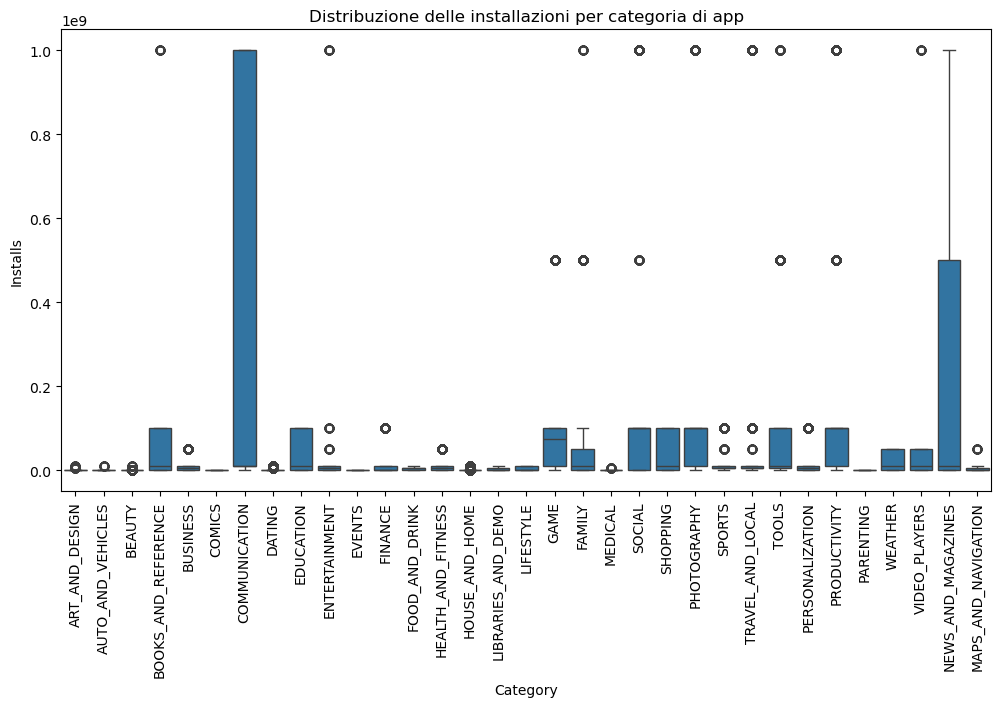

In [ ]:

plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_data, x='Category', y='Installs' )

plt.xticks(rotation=90)
plt.title('Distribuzione delle installazioni per categoria di app')
plt.show()

# Il genere communication è quello col più alto numero di installzioni , la barra si presenta lineare senza outlier. La maggior dispersione di dati
# positiva la riscontriamo nel genere news and magazine

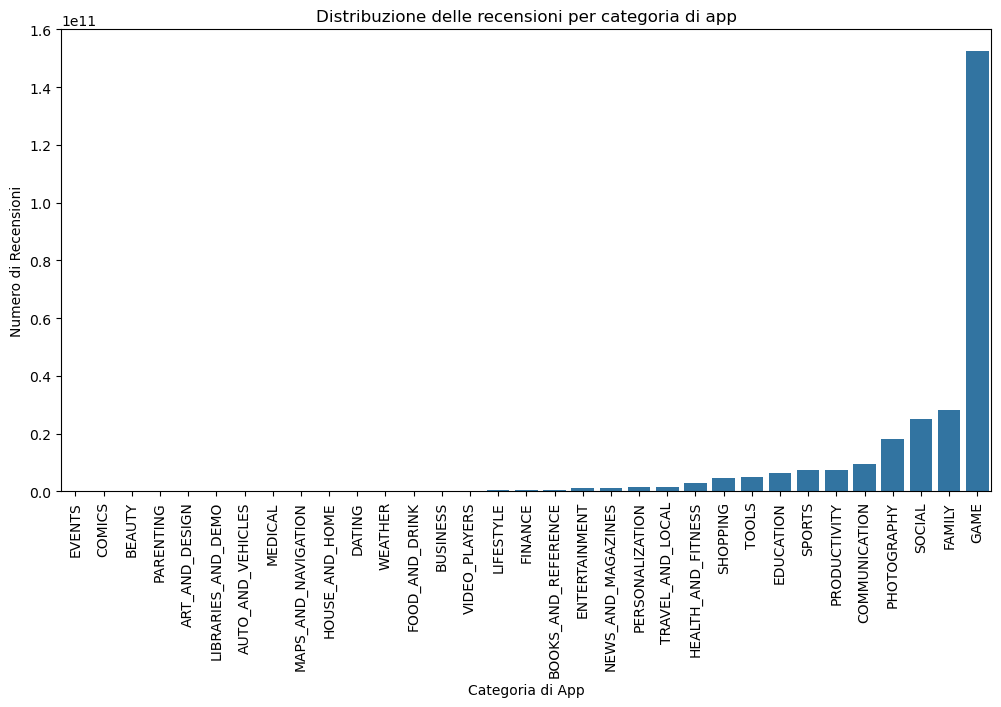

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt


reviews_by_category = merged_data.groupby('Category')['Reviews'].sum().sort_values()


plt.figure(figsize=(12, 6))
sns.barplot(x=reviews_by_category.index, y=reviews_by_category.values)


plt.xticks(rotation=90)
plt.title('Distribuzione delle recensioni per categoria di app')
plt.ylabel('Numero di Recensioni')
plt.xlabel('Categoria di App')

plt.show()



# In questo grafico possiamo vedere come il più alto numero di recensioni sia nella categoria game , preceduta dalla categoria family e social.

In [ ]:
import pandas as pd
data_user = pd.read_csv("C:\\Users\\Flavio\\Desktop\\Dataset progetto pandas\\googleplaystore_user_reviews.csv") #secondo dataframe caratterizzato dalle
data_user                                                                                                       # recensioni degli utenti alle App


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [ ]:
data_user.describe() # possiamo vedere presenza di outlier alti , indici di basso apprezzamento
                              # nel Sentiment_polarity in quanto la mediana è superiore alla media.
                              # Nel sentiment_subjectivity la mediana è leggermente minore della media, ciò
                              # indicherebbe una predominanza delle valutazioni basate sull'oggettività rispetto
                              # alla soggettività.

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [ ]:

std_value = 0.351301  # Deviazione standard Sentiment_polarity
mean_value = 0.150000  # Media

# Coefficiente di variazione Sentiment_polarity
cv = (std_value / mean_value) * 100


print(f"Coefficiente di variazione: {cv:.2f}%")


Coefficiente di variazione: 234.20%


In [ ]:
# un coeficiente di variazione così suggerisce elevato suggerisce una grande dispersione delle valutazioni cioè una grande variabilità sulle valutazioni

In [ ]:
print(data_user.loc[data_user['Sentiment_Polarity'].idxmax() , ['App' , 'Sentiment_Polarity']])
# l'App col maggior indice di Sentiment polarity positivi è un editor  di foto

App                   10 Best Foods for You
Sentiment_Polarity                      1.0
Name: 0, dtype: object


In [ ]:
print(data_user.loc[data_user['Sentiment_Subjectivity'].idxmax() , ['App' , 'Sentiment_Subjectivity']])
# L'App col maggior indice di Sentiment basato sulla soggettività è un programma che aiuta a consigliare sul cibo

App                       10 Best Foods for You
Sentiment_Subjectivity                      1.0
Name: 16, dtype: object


In [ ]:
print(data_user_filtered.loc[data_user_filtered['Sentiment_Polarity'].idxmax() , ['App2' , 'Sentiment_Polarity']])
# L'app col maggior indice di apprezzamento è un programma per editare le foto

App2                  AirBrush: Easy Photo Editor
Sentiment_Polarity                            1.0
Name: 4926, dtype: object


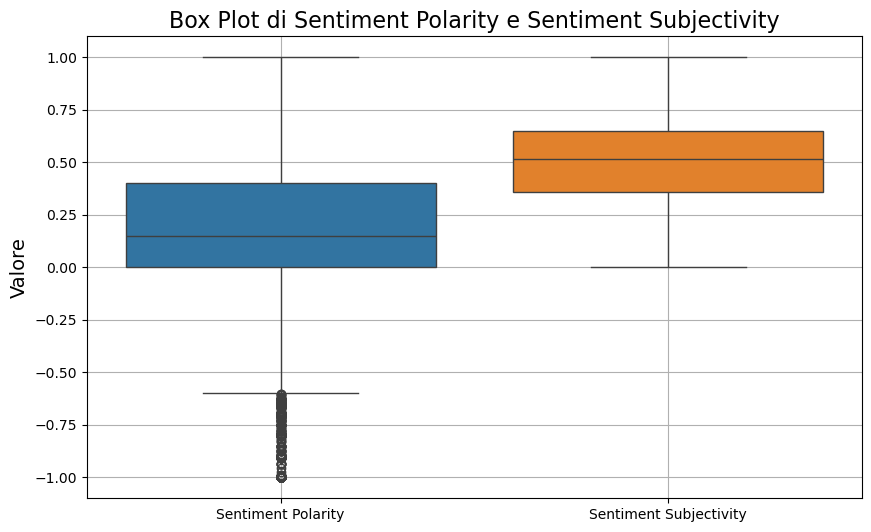

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=data_user[['Sentiment_Polarity', 'Sentiment_Subjectivity']])


plt.title('Box Plot di Sentiment Polarity e Sentiment Subjectivity', fontsize=16)
plt.ylabel('Valore', fontsize=14)


plt.xticks(ticks=[0, 1], labels=['Sentiment Polarity', 'Sentiment Subjectivity'])
plt.grid()
plt.show()     # Da questo box plot si denotano degli outlier negativi nelle valutazioni generiche che
               # vanno a influire sulla mediana e una disoersoine dei valori nel 25esimo percentile.
               # Nel sentiment Sujectivity abbiamo una simmetria maggiore con una mediana più spostata a destra e quindi
               # con una predominanza di recensioni positive.

In [ ]:
""""
CONCLUSIONI :  Bisognerebbe puntare ad un App rivolta verao un pubblico giovanile che si concentri sull'intrattenimento
videoludico oppure proponendo qualcosa che verta su interessi più intellettivi come la ricerca di libri / fumetti / musica
e che punti ad un buon punteggio di Sentiment_subjectivity considerando il pubblico giovanile tendenzialmente più introverso
o focalizzato sulla prorpia individualità.

Per un pubblico più adulto invece sarebbe più utile un App che aiuti a risolvere problemi legati alla vita adulta come la categoria Auto e veicoli
o il genere Family e che si focalizzi sul Sentiment_polarity.